Dibuat Oleh

1.   Ilham Mustaqiim 21.11.3969
2.   Wildan Amru Primarifki 21.11.4030
3.   Muhammad Hamdan Zulfa 21.11.4039





dataset : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

# **Import library dan dataset**

In [ ]:
# Mengimport library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

In [ ]:
# Membuat dataframe
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# **Exploratory Data Analysis**

In [ ]:
# Mengubah urutan kolom menjadi di kiri
df.head(6).transpose()

,0,1,2,3,4,5
age,75.0,55.00,65.0,50.0,65.0,90.0
anaemia,0.0,0.00,0.0,1.0,1.0,1.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0,47.0
diabetes,0.0,0.00,0.0,0.0,1.0,0.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0,40.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0,1.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0,204000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7,2.1
serum_sodium,130.0,136.00,129.0,137.0,116.0,132.0
sex,1.0,1.00,1.0,1.0,0.0,1.0


In [ ]:
# Melihat informasi data frame tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# Melihat jumlah null pada tiap kolom
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# Mengecek duplikat
df.duplicated().sum()

0

In [ ]:
# Melihat deskripsi analitik
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# Melihat bentuk baris dan kolom
df.shape

(299, 13)

In [ ]:
# Menghitung kolom DEATH_EVENT (variabel dependent)
value_counts = df['DEATH_EVENT'].value_counts()

# Print hasilnya
print("Diketahui jumlah 0 dan 1:")
print(value_counts)

Diketahui jumlah 0 dan 1:
0    203
1     96
Name: DEATH_EVENT, dtype: int64


<Axes: title={'center': 'Distribusi data DEATH_EVENT sebelum Preprocess'}>

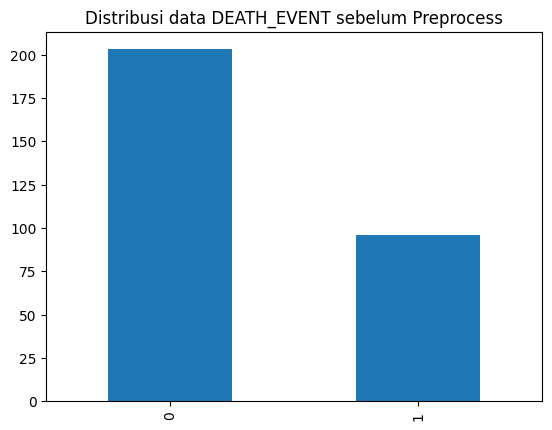

In [ ]:
# Distribusi data dalam plot bar
df['DEATH_EVENT'].value_counts().plot(kind = 'bar', title = 'Distribusi data DEATH_EVENT sebelum Preprocess')

Telah terjadi imbalance data signifikan pada DEATH_EVENT pada nilai value 1 (mati)

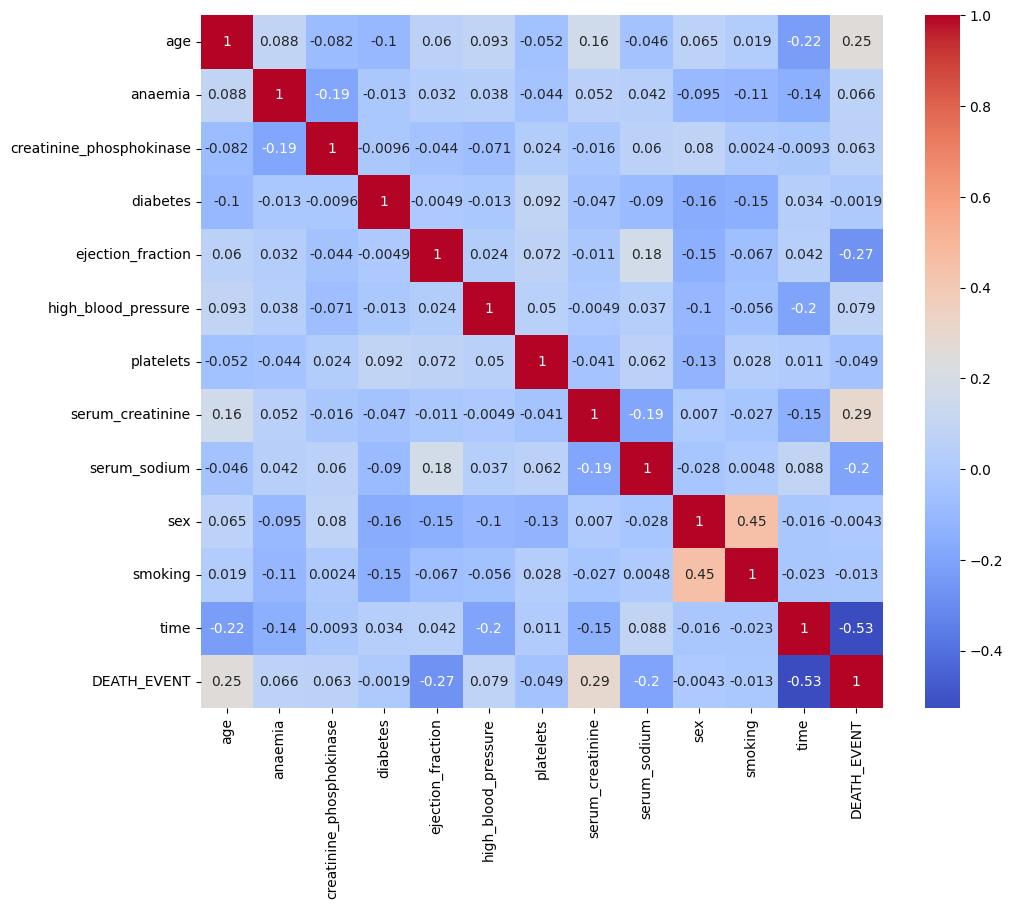

In [ ]:
# Lihat Korelasi
cor = df.corr()
plt.figure(figsize=(11,9))
sns.heatmap(cor, cmap='coolwarm',annot=True)
plt.show()

# **Preprocessing**

## Ubah nama kolom menjadi lowercase dan cek duplikat data

In [ ]:
# Mengecilkan seluruh nama kolom
df.columns = df.columns.str.lower()

In [ ]:
# Mengecek nama kolom
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

## Oversampling data untuk mengatasi imbalance data

In [ ]:
# Melakukan oversampling supaya data balance

# Memfilter dua jenis value
class_0 = df[df['death_event'] == 0]
class_1 = df[df['death_event'] == 1]

# Oversampling minoritas pada class_1 menggunakan metode Random Oversampling
class_1_over = class_1.sample(len(class_0), replace=True)

# Membuat dataframe baru dengan sampel class_1 dan class_0
df_new = pd.concat([class_0, class_1_over], axis=0)

# Melihat hasil oversampling
df_new['death_event'].value_counts()

0    203
1    203
Name: death_event, dtype: int64

<Axes: title={'center': 'Label Distribution after Oversampling'}>

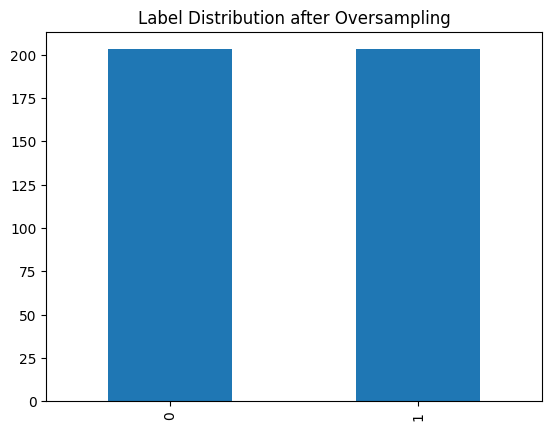

In [ ]:
# Melihat plotting hasil oversampling
df_new['death_event'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

## Pemilihan Fitur

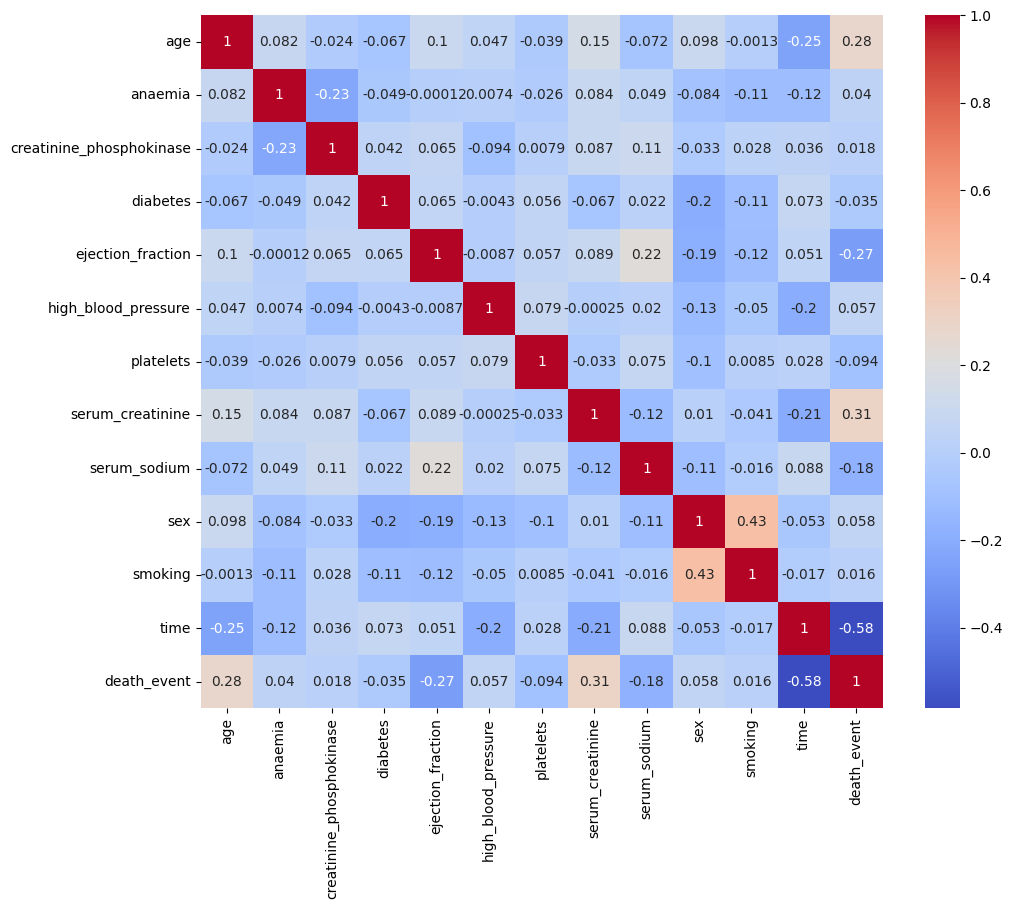

In [ ]:
# Melihat korelasi heatmap
cor = df_new.corr()
plt.figure(figsize=(11,9))
sns.heatmap(cor, cmap='coolwarm',annot=True)
plt.show()

In [ ]:
# Mencopy dataframe dan menentukan correlation
df_feature_select = df_new.copy()
cor = df_feature_select.corr()

# Menentukan target correlation
cor_target = (cor['death_event'])

# Memilih correlation yang lebih besar dari -5.0
relevant_features = cor_target[cor_target > -0.5]
relevant_features

age                         0.279221
anaemia                     0.039817
creatinine_phosphokinase    0.018353
diabetes                   -0.035172
ejection_fraction          -0.270720
high_blood_pressure         0.056721
platelets                  -0.093882
serum_creatinine            0.306356
serum_sodium               -0.178973
sex                         0.057955
smoking                     0.015684
death_event                 1.000000
Name: death_event, dtype: float64

In [ ]:
# Memilih kolom fitur fitur yang relevant
# Menghapus  nilai time karena tidak relevant
relevant_features_col = ['age', 'anaemia', 'creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','death_event']

In [ ]:
# Hasil seleksi fitur relevant
selected_df = df_new[relevant_features_col]
selected_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,0


# **Split Data**

In [ ]:
# Splitting data
X = selected_df.drop(['death_event'], axis = 1) # features
y = selected_df['death_event'] # labels

In [ ]:
# Membagi fitur dan label menjadi train dan test dengan ukuran test = 20% dan ukuran train = 80%
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=7)

In [ ]:
# Print jumlah data yang sudah displit
print("Jumlah data latih (X_train):", len(X_train))
print("Jumlah data uji (X_test):", len(X_test))
print("Jumlah label data latih (y_train):", len(y_train))
print("Jumlah label data uji (y_test):", len(y_test))

Jumlah data latih (X_train): 324
Jumlah data uji (X_test): 82
Jumlah label data latih (y_train): 324
Jumlah label data uji (y_test): 82


# Scaling

In [ ]:
# Mengambil data X_train dan X_test untuk disimpan di variabel baru
# Berguna pada tahap Prediction untuk komparasi
X_train_ori = X_train
X_test_ori = X_test

In [ ]:
# Scalling agar range data tidak terlalu jauh
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Modeling**

In [ ]:
# Inisialisasi KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Tentukan rentang nilai n_neighbors yang ingin diuji
param_grid = {
    'n_neighbors': range(1, 31),
    'p': [1, 2]
}

# Inisialisasi GridSearchCV dengan cross-validation 5 lipatan dan scoring untuk precision, recall, dan f1
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], refit='accuracy')

# Lakukan grid search pada data latih yang telah di-"scaled"
grid_search.fit(X_train, y_train)

# Tampilkan hasil grid search
results = pd.DataFrame(grid_search.cv_results_)

# Tampilkan parameter terbaik
print("\nParameter Terbaik:", grid_search.best_params_)

# Evaluasi model terbaik pada data uji
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Tampilkan hasil evaluasi model terbaik
print("\nEvaluasi Model Terbaik pada Data Uji:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),2))
print("Precision:", round(precision_score(y_test, y_pred, average='macro'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='macro'),2))
print("F1 Score:", round(f1_score(y_test, y_pred, average='macro'),2))


Parameter Terbaik: {'n_neighbors': 1, 'p': 2}

Evaluasi Model Terbaik pada Data Uji:
Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1 Score: 0.86


In [ ]:
# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=1, p=2)

# Latih model pada data latih yang telah di-"scaled"
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

# Prediction

In [ ]:
# Prediksi pada data uji yang telah di-"scaled"
predictions = knn_model.predict(X_test)

In [ ]:
# Print feature X_train
print('\nFitur X_train:\n', X_train_ori.iloc[3])

# Assuming predictions is defined
# Print the corresponding prediction
print('Prediction: ', predictions[3])

# Print the actual label for the fourth element from y_test
print('\nData asli y_test:\n', y_test.iloc[3])


Fitur X_train:
 age                             60.0
anaemia                          1.0
creatinine_phosphokinase       737.0
diabetes                         0.0
ejection_fraction               60.0
high_blood_pressure              1.0
platelets                   210000.0
serum_creatinine                 1.5
serum_sodium                   135.0
sex                              1.0
smoking                          1.0
Name: 120, dtype: float64
Prediction:  1

Data asli y_test:
 1


In [ ]:
# Prediction dan label aktual
result_df = pd.DataFrame({'Prediction': predictions[:10], 'Label Aktual': y_test.iloc[:10].values})

# Print DataFrame
print(result_df)

   Prediction  Label Aktual
0           1             1
1           0             1
2           1             1
3           1             1
4           1             1
5           1             1
6           1             1
7           1             1
8           0             0
9           1             1


# **Evaluasi**

In [ ]:
# Menghitung akurasi, skor f1, presisi, dan perolehan model
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='macro')
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')

# Menghitung laporan klasifikasi
classificationreport = classification_report(y_test, predictions)

print('\nAccuracy score of KNN Classifier : ' + str(round(accuracy, 2)))
print('Precision score of KNN Classifier : ' + str(round(precision, 2)))
print('Recall score of KNN Classifier : ' + str(round(recall, 2)))
print('F1-score score of KNN Classifier : ' + str(round(f1, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)


Accuracy score of KNN Classifier : 0.87
Precision score of KNN Classifier : 0.88
Recall score of KNN Classifier : 0.87
F1-score score of KNN Classifier : 0.86

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.97      0.76      0.85        42
           1       0.80      0.97      0.88        40

    accuracy                           0.87        82
   macro avg       0.88      0.87      0.86        82
weighted avg       0.88      0.87      0.86        82



Confusion Matrix for K - Nearest Neighbors


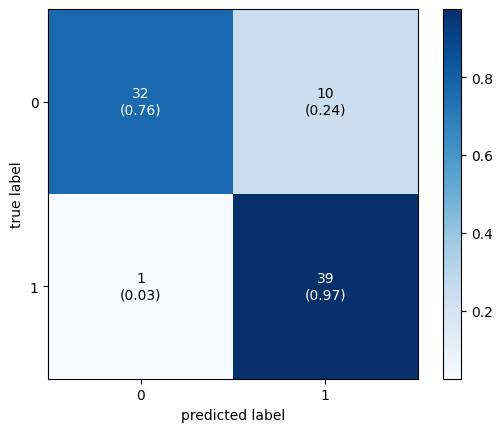

In [ ]:
# Print Confusion Matrix
print('Confusion Matrix for K - Nearest Neighbors')

# Menghitung dan merencanakan matriks kebingungan
cm = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()